### CM1 RAD4K RCE theta, qv profiles for input_sounding in EXPs

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/data2/willytsai/cm1r19.8/analysis/runs_cheyenne/')
snd_TOGA = np.loadtxt('sounding_TOGA')

In [4]:
os.chdir('/data2/willytsai/cm1r19.8/analysis/runs_cheyenne/CM1_RAD4K_MPI_SFXint')
data = xr.open_dataset('cm1out_thqv.nc')
th = (data.th)[-72:,:,:,:]
qv = (data.qv)[-72:,:,:,:]

In [ ]:
# create txt file corresponding to the required format of input_sounding
u = np.zeros(len(th_mean))
v = u

first_line = np.column_stack([1006.00,299.35,20.00])
np.savetxt('input_sounding_RCE',first_line,fmt=['%10.4f','%8.4f','%8.4f'],delimiter='   ')

file = open('input_sounding_RCE','a')
var = np.column_stack([1000*th.lev.values, th_mean.values, 1000*qv_mean.values, u, v])
np.savetxt(file,var,
          fmt=['%10.4f','%8.4f','%8.4f','%8.4f','%8.4f'],delimiter='   ')
file.close()

### plotting RCE sounding profile

In [13]:
server = '/data2/willytsai/cm1r19.8/analysis/runs_cheyenne/'
fig_dir = server + 'fig_sum/'

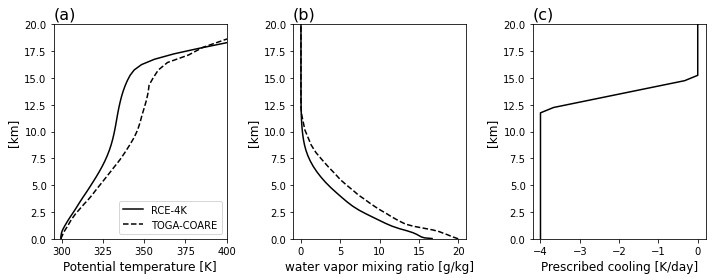

In [28]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
th_mean = th.mean(axis=(0,2,3))
qv_mean = qv.mean(axis=(0,2,3))

cooling = np.zeros(len(th_mean.lev))
for n,z in enumerate(th_mean.lev*1000):
    if z <= 12000:
        cooling[n] = -4
    elif (z> 12000 and z<=15000):
        cooling[n] = -4*(15000-z)/3000

# potential temperature profile
ax[0].plot(th_mean,th.lev,'k',label='RCE-4K')
ax[0].plot(snd_TOGA[:,1],snd_TOGA[:,0]/1000,'--k',label='TOGA-COARE')
ax[0].set_ylim([0,20]);ax[0].set_xlim([295,400])
ax[0].set_ylabel('[km]',fontsize=12)
ax[0].set_xlabel('Potential temperature [K]',fontsize=12)
ax[0].legend()

# water vapor mixing ratio profile
ax[1].plot(1000*qv_mean,th.lev,'k',label='RCE-4K')
ax[1].plot(snd_TOGA[:,2],snd_TOGA[:,0]/1000,'--k',label='TOGA-COARE')
ax[1].set_ylim([0,20])
ax[1].set_ylabel('[km]',fontsize=12)
ax[1].set_xlabel('water vapor mixing ratio [g/kg]',fontsize=12)

ax[2].plot(cooling,th_mean.lev,'k')
ax[2].set_ylim([0,20])
ax[2].set_ylabel('[km]',fontsize=12)
ax[2].set_xlabel('Prescribed cooling [K/day]',fontsize=12)

ax[0].set_title('(a)',fontsize=16,loc='left')
ax[1].set_title('(b)',fontsize=16,loc='left')
ax[2].set_title('(c)',fontsize=16,loc='left')

plt.tight_layout()

fig.savefig(fig_dir+'RCE_sounding.pdf',bbox_inches='tight',transparent=False)

Text(0.5, 0, 'Prescribed cooling [K/day]')

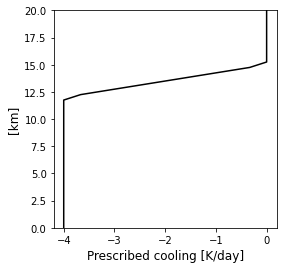

In [24]:
# Radiative cooling profile 
fig = plt.figure(figsize=(4,4))
cooling = np.zeros(len(th_mean.lev))
for n,z in enumerate(th_mean.lev*1000):
    if z <= 12000:
        cooling[n] = -4
    elif (z> 12000 and z<=15000):
        cooling[n] = -4*(15000-z)/3000
plt.plot(cooling,th_mean.lev,'k')
plt.ylim([0,20])
plt.ylabel('[km]',fontsize=12)
plt.xlabel('Prescribed cooling [K/day]',fontsize=12)